# EE4305 MLP & CNN CIFAR10 Classifier Project
By: Tan RongDe Darius (A0146654Y)

System Specifications:

CPU: Intel Core i7-7700HQ @ 2.80GHz | GPU: NVIDIA GeForce GTX 1050 Ti | RAM: 16GB | Software: Keras, TensorFlow-GPU, CUDA 9.0

## 1. Loading data

In [1]:
import time
import matplotlib
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
import numpy as np

# MLP
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from keras.constraints import maxnorm
from keras.optimizers import SGD, RMSprop, Adam, Nadam

# Both
from keras.layers import Activation
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

# CNN

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras import backend as K

# Data
from keras.datasets import cifar10

Using TensorFlow backend.


## 2. Additional Functions

In [2]:
# Make sure TensorFlow running on GPU

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()

import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
def plothist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def plothist_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## 3. MLP Architecture (Sample)

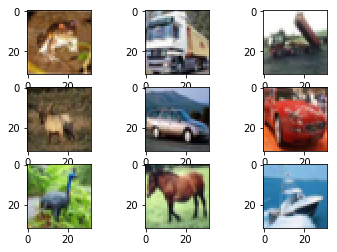

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_91 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_92 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 10)                2570      
__________

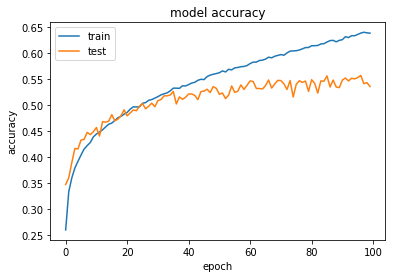

In [34]:
MLP_num_epoch = 100
MLP_batch_size = 128
MLP_num_classes = 10

(MLP_x_train, MLP_y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

# display images from dataset
images = range(0,9)
for i in images:
        plt.subplot(330 + 1 + i)
        plt.imshow(MLP_x_train[i].reshape(32,32,3))
plt.show()

MLP_x_train = MLP_x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test = MLP_x_test.reshape(10000, 32 * 32 * 3)

MLP_x_train = MLP_x_train.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_test /= 255.0

# one-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes) 
MLP_y_test_1hot = np_utils.to_categorical(MLP_y_test, MLP_num_classes)

# MLP
MLP_model = Sequential()
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(256))
MLP_model.add(Activation('relu'))
# MLP_model.add(Activation('sigmoid'))
# MLP_model.add(Activation('tanh'))
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(10)) # use 10 neurons as the output 
MLP_model.add(Activation('softmax'))

MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
MLP_opt_RMSprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
MLP_opt_nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

MLP_model.compile(loss='categorical_crossentropy', 
                  optimizer=MLP_opt_sgd,
                  metrics=['accuracy']) 
MLP_model.summary()

# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
#                     validation_split = 0.2)
                    validation_data=(MLP_x_test, MLP_y_test_1hot))

# MLP_model.save('MLP_model_sample.h5') #saved 31/10 9pm

# Evaluation on the training
print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)
plothist(history)

## 4. MLP Architecture (Improved Version)

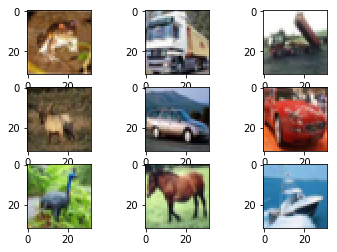

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 512)               1573376   
_________________________________________________________________
activation_87 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_88 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 512)               262656    
__________

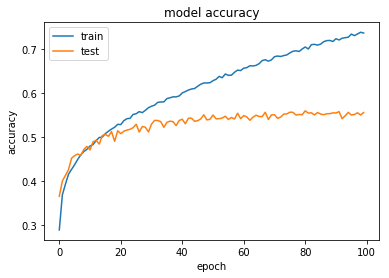

Evaluation with Test Set:
Test loss: 1.4013736206054688
Test acc: 0.5436


In [33]:
MLP_num_epoch = 100
MLP_batch_size = 128
MLP_num_classes = 10

(MLP_x_train, MLP_y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

# display images from dataset
images = range(0,9)
for i in images:
        plt.subplot(330 + 1 + i)
        plt.imshow(MLP_x_train[i].reshape(32,32,3))
plt.show()

MLP_x_train = MLP_x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test = MLP_x_test.reshape(10000, 32 * 32 * 3)

MLP_x_train = MLP_x_train.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_test /= 255.0

# One-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes) 
MLP_y_test_1hot = np_utils.to_categorical(MLP_y_test, MLP_num_classes)

# MLP
MLP_model = Sequential()
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(512))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(512))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.2))


MLP_model.add(Dense(10))
MLP_model.add(Activation('softmax'))

# MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
# MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
# MLP_opt_RMSprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# MLP_opt_nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

# Loss function - multiclass system so use categorical_crossentropy
MLP_model.compile(loss='categorical_crossentropy',
                  optimizer=MLP_opt_sgd_Nmom,
                  metrics=['accuracy'])
MLP_model.summary()

# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
                    validation_split = 0.2) # using 40000|10000|10000 training, validation, testing

# MLP_model.save('MLP_model.h5') #saved 31/10 9pm

# Evaluation on the training
print('Training Outcome:')
plothist(history)

print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

## 5. MLP Classifier (Improved Version with Nadam optimiser)

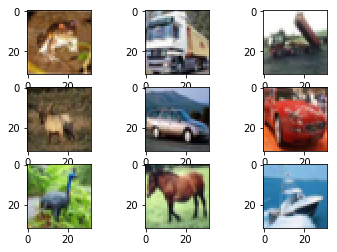

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 512)               1573376   
_________________________________________________________________
activation_293 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_147 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_158 (Dense)            (None, 512)               262656    
_________________________________________________________________
activation_294 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_148 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_159 (Dense)            (None, 512)               262656    
__________

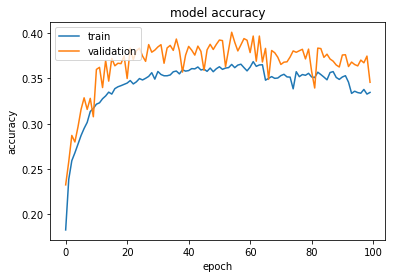

Evaluation with Test Set:
Test loss: 1.8163311065673828
Test acc: 0.3531


In [72]:
MLP_num_epoch = 100
MLP_batch_size = 128
MLP_num_classes = 10

(MLP_x_train, MLP_y_train), (MLP_x_test, MLP_y_test) = cifar10.load_data()

# display images from dataset
images = range(0,9)
for i in images:
        plt.subplot(330 + 1 + i)
        plt.imshow(MLP_x_train[i].reshape(32,32,3))
plt.show()

MLP_x_train = MLP_x_train.reshape(50000, 32 * 32 * 3)
MLP_x_test = MLP_x_test.reshape(10000, 32 * 32 * 3)

MLP_x_train = MLP_x_train.astype('float32')
MLP_x_test = MLP_x_test.astype('float32')

# Normalise data
MLP_x_train /= 255.0
MLP_x_test /= 255.0

# One-hot format
MLP_y_train_1hot = np_utils.to_categorical(MLP_y_train, MLP_num_classes) 
MLP_y_test_1hot = np_utils.to_categorical(MLP_y_test, MLP_num_classes)

# MLP
MLP_model = Sequential()
MLP_model.add(Dense(512, input_shape=MLP_x_train.shape[1:]))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(512))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(512))
MLP_model.add(Activation('relu'))
MLP_model.add(Dropout(0.5))


MLP_model.add(Dense(10))
MLP_model.add(Activation('softmax'))

# MLP_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
# MLP_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
MLP_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
# MLP_opt_RMSprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# MLP_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
MLP_opt_nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

# Loss function - multiclass system so use categorical_crossentropy
MLP_model.compile(loss='categorical_crossentropy',
                  optimizer=MLP_opt_nadam,
                  metrics=['accuracy'])
MLP_model.summary()

# training
print('Training.....')
history = MLP_model.fit(MLP_x_train, MLP_y_train_1hot,
                    batch_size=MLP_batch_size,
                    epochs=MLP_num_epoch,
                    verbose=1,
                    validation_split = 0.2) # using 40000|10000|10000 training, validation, testing

# MLP_model.save('MLP_model.h5') #saved 31/10 9pm

# Evaluation on the training
print('Training Outcome:')
plothist(history)

print('Evaluation with Test Set:')
loss, acc = MLP_model.evaluate(MLP_x_test, MLP_y_test_1hot, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

## 6. CNN Architecture (Sample)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_102 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_103 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 7200)              0         
__________

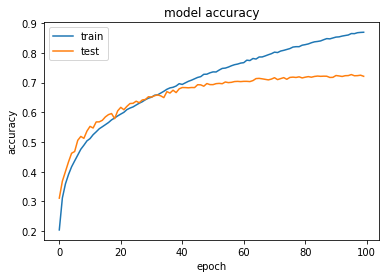

Test loss: 0.8638767498970031
Test acc: 0.7214


In [37]:
# Retrieving Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Declare variables

nb_epoch = 100
batch_size = 128
nb_classes = 10

# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train  /= 255
x_test /= 255

def base_model():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    sgd = SGD()

# Train model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

cnn_n = base_model()
cnn_n.summary()

# Fit model

cnn = cnn_n.fit(x_train, y_train,
                batch_size=batch_size, 
                epochs=nb_epoch, 
                validation_data=(x_test,y_test),
                shuffle=True)

MLP_model.save('CNN_model_sample.h5')
plothist(cnn)

loss, acc = cnn_n.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

## 7. CNN Architecture (Improved version without data augmentation)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_180 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_63 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_181 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_64 (Batc (None, 28, 28, 32)        128       
__________

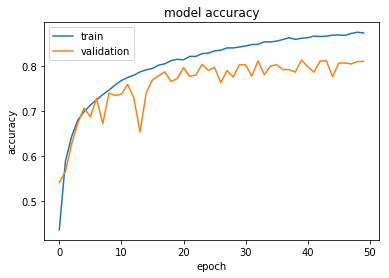

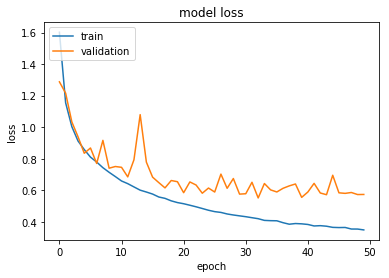

Evaluation with Test Set:
Test loss: 0.5764691339492798
Test acc: 0.8069


In [41]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 50
CNN_batch_size = 64
nb_classes = 10

# Convert and pre-processing

CNN_y_train = np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(Dropout(0.5))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
    CNN_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
    CNN_opt_RMSprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    CNN_opt_nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer=CNN_opt_adam,
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
                batch_size=CNN_batch_size, 
                epochs=CNN_nb_epoch, 
                validation_split = 0.2, # validation_data=(CNN_x_test,CNN_y_test),
                shuffle=True)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

## 8. CNN Architecture (Improved version with data augmentation 50 epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_221 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_87 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_222 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_88 (Batc (None, 28, 28, 32)        128       
__________

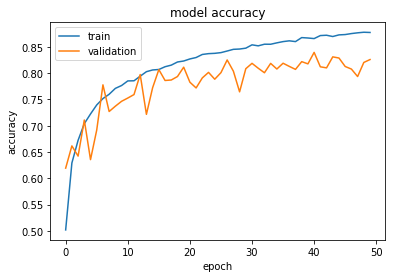

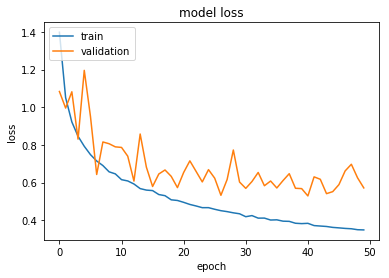

Evaluation with Test Set:
Test loss: 0.5961983642816544
Test acc: 0.817


In [50]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 50
CNN_batch_size = 64
nb_classes = 10

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        rotation_range = 10,
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

# Convert and pre-processing

CNN_y_train = np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

train_generator = train_datagen.flow(CNN_x_train[:40000], CNN_y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(CNN_x_train[40000:], CNN_y_train[40000:], batch_size=32)

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#     CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#     CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
#     CNN_model.add(Dropout(0.5))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
    CNN_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
    CNN_opt_RMSprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    CNN_opt_nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer=CNN_opt_adam,
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
# CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
#                 batch_size=CNN_batch_size, 
#                 epochs=CNN_nb_epoch, 
#                 validation_split = 0.2, # validation_data=(CNN_x_test,CNN_y_test),
#                 shuffle=True)

CNN_history = cnn_n.fit_generator(train_generator,
                                  validation_data=validation_generator,
                                  validation_steps=len(CNN_x_train[40000:]) / 32,
                                  steps_per_epoch=len(CNN_x_train[:40000]) / 32,
                                  epochs=CNN_nb_epoch,
                                  shuffle=True)
#                                   verbose=2)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

## 9. CNN Architecture (Improved version with data augmentation 80 epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_137 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_297 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_99 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_298 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_100 (Bat (None, 28, 28, 32)        128       
__________

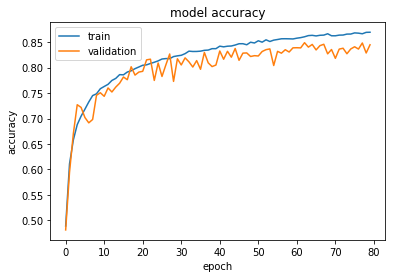

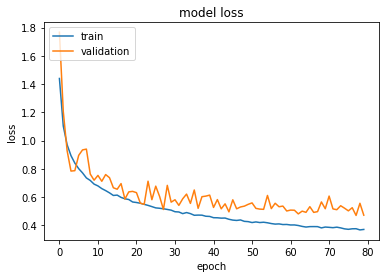

Evaluation with Test Set:
Test loss: 0.48672348487377165
Test acc: 0.842


In [73]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 80
CNN_batch_size = 64
nb_classes = 10

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        rotation_range = 10,
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

# Convert and pre-processing

CNN_y_train = np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

train_generator = train_datagen.flow(CNN_x_train[:40000], CNN_y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(CNN_x_train[40000:], CNN_y_train[40000:], batch_size=32)

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#     CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#     CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(Dropout(0.2))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
    CNN_opt_sgd_Nmom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
    CNN_opt_RMSprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    CNN_opt_nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer=CNN_opt_adam,
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
# CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
#                 batch_size=CNN_batch_size, 
#                 epochs=CNN_nb_epoch, 
#                 validation_split = 0.2, # validation_data=(CNN_x_test,CNN_y_test),
#                 shuffle=True)

CNN_history = cnn_n.fit_generator(train_generator,
                                  validation_data=validation_generator,
                                  validation_steps=len(CNN_x_train[40000:]) / 32,
                                  steps_per_epoch=len(CNN_x_train[:40000]) / 32,
                                  epochs=CNN_nb_epoch,
                                  shuffle=True)
#                                   verbose=2)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)